In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df100k = pd.read_csv('poker100k.csv')
df100k.head()

,First Card,Second Card,Third Card,Fourth Card,Fifth Card,Result
0,Nine Hearts,Ten Spades,King Hearts,King Clubs,Jack Spades,Pair
1,Ace Clubs,Queen Diamonds,Jack Spades,Jack Clubs,Ace Spades,Two Pairs
2,King Hearts,Nine Diamonds,Queen Hearts,Ten Clubs,Ten Diamonds,Pair
3,Nine Hearts,Nine Diamonds,Ace Diamonds,Jack Clubs,Queen Spades,Pair
4,Nine Diamonds,Nine Spades,Nine Hearts,King Spades,Nine Clubs,Four of a Kind


In [3]:
df100k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100128 entries, 0 to 100127
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   First Card   100128 non-null  object
 1   Second Card  100128 non-null  object
 2   Third Card   100128 non-null  object
 3   Fourth Card  100128 non-null  object
 4   Fifth Card   100128 non-null  object
 5   Result       100128 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [4]:
df100k.describe()   

,First Card,Second Card,Third Card,Fourth Card,Fifth Card,Result
count,100128,100128,100128,100128,100128,100128
unique,24,24,24,24,24,6
top,Ten Clubs,Nine Spades,Queen Clubs,King Spades,Queen Spades,Pair
freq,4313,4309,4349,4333,4297,54288


In [5]:
#unique values from each column
df100k.nunique()

First Card     24
Second Card    24
Third Card     24
Fourth Card    24
Fifth Card     24
Result          6
dtype: int64

In [6]:
#check for null values
df100k.isnull().sum()


First Card     0
Second Card    0
Third Card     0
Fourth Card    0
Fifth Card     0
Result         0
dtype: int64

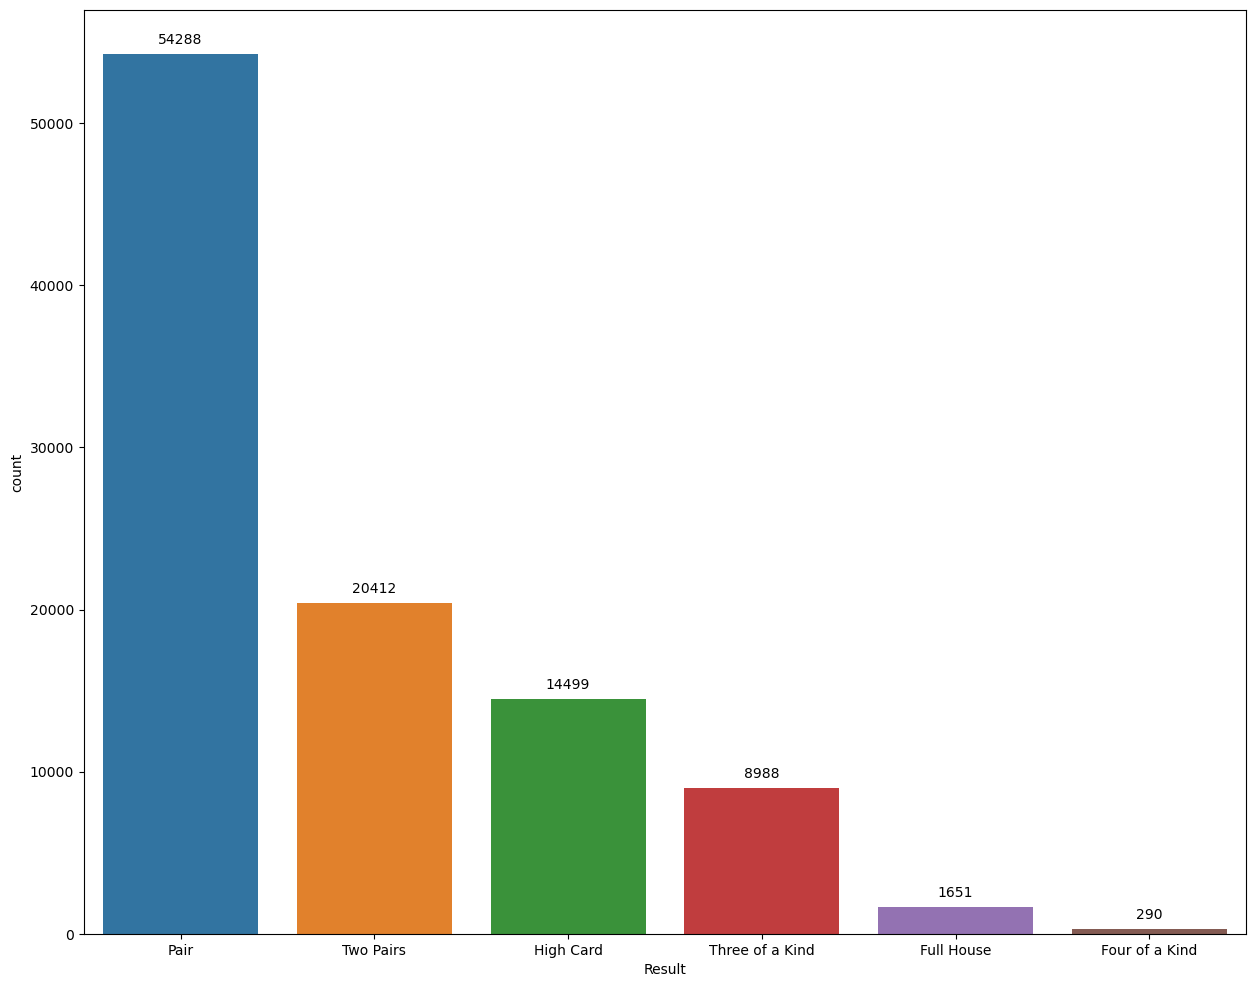

In [7]:
#visualize the data and show exact values on the top of the bars
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='Result', data=df100k, order=df100k['Result'].value_counts().index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

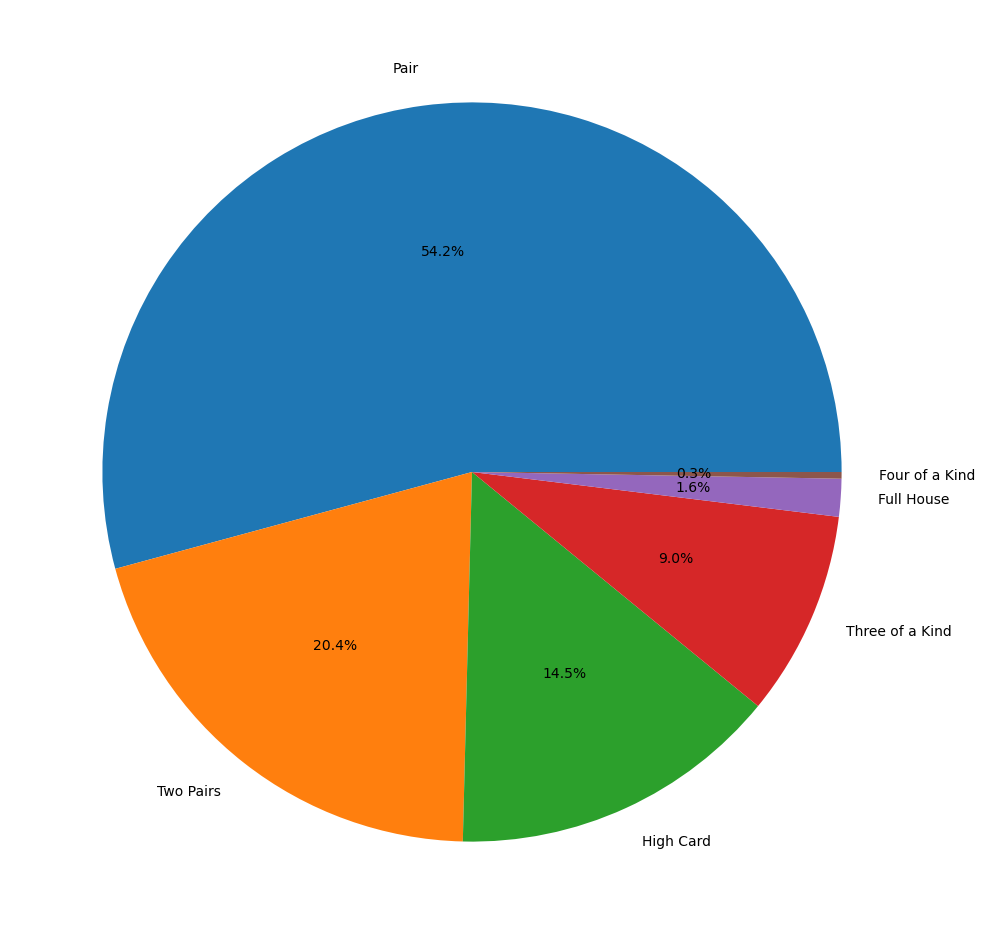

In [8]:
# Show percentage of each class in the dataset based on the total number of samples
percentages = df100k['Result'].value_counts(normalize=True) * 100

# Make a pie chart
plt.figure(figsize=(15, 12))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.show()



In [9]:
#create a new df for changing the object values to numeric
df100k_num = df100k.copy()


In [12]:
cat_cols = df100k_num.select_dtypes(include=['object']).columns
num_cols = df100k_num.select_dtypes(exclude=['object']).columns

In [13]:
print(cat_cols)

Index(['First Card', 'Second Card', 'Third Card', 'Fourth Card', 'Fifth Card',
       'Result'],
      dtype='object')


In [14]:
#change categorical data to numerical data

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Loop through each categorical column in cat_cols
for col in cat_cols:
    # Fit the LabelEncoder object to the categorical column
    le.fit(df100k_num[col])
    # Transform the categorical column to an integer column
    df100k_num[col] = le.transform(df100k_num[col])

In [15]:
from sklearn.model_selection import train_test_split

#set the target variable
y = df100k_num['Result']
X = df100k_num.drop(['Result'], axis=1)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [17]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 1.0362522137314185
Mean Absolute Error (MAE): 0.8077525587241463
R-squared Score: -0.0002730628860956319

Results for Decision Tree:
Mean Squared Error (MSE): 0.7379406771197443
Mean Absolute Error (MAE): 0.3549385798461999
R-squared Score: 0.28768096072591676

Results for Random Forest:
Mean Squared Error (MSE): 0.3215741136522521
Mean Absolute Error (MAE): 0.3773124937581145
R-squared Score: 0.6895910866626243

Results for SVR:
Mean Squared Error (MSE): 0.9458333146879648
Mean Absolute Error (MAE): 0.6619999190845286
R-squared Score: 0.08700645062472012

Results for XGBoost:
Mean Squared Error (MSE): 0.4581595681789143
Mean Absolute Error (MAE): 0.43190489449391983
R-squared Score: 0.5577479415916845

Results for LightGBM:
Mean Squared Error (MSE): 0.715828411293848
Mean Absolute Error (MAE): 0.6576279175379298
R-squared Score: 0.3090254785681278

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.926717946307

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Results for Linear SVR:
Mean Squared Error (MSE): 1.2150485204800001
Mean Absolute Error (MAE): 0.7605638570834913
R-squared Score: -0.17286148008245172

Learning rate set to 0.081838
0:	learn: 1.0178066	total: 180ms	remaining: 2m 59s
1:	learn: 1.0080911	total: 184ms	remaining: 1m 32s
2:	learn: 0.9986646	total: 189ms	remaining: 1m 2s
3:	learn: 0.9940285	total: 194ms	remaining: 48.3s
4:	learn: 0.9857051	total: 199ms	remaining: 39.6s
5:	learn: 0.9817883	total: 204ms	remaining: 33.7s
6:	learn: 0.9747051	total: 208ms	remaining: 29.6s
7:	learn: 0.9714530	total: 214ms	remaining: 26.5s
8:	learn: 0.9654864	total: 218ms	remaining: 24s
9:	learn: 0.9604059	total: 222ms	remaining: 22s
10:	learn: 0.9560944	total: 227ms	remaining: 20.4s
11:	learn: 0.9483671	total: 232ms	remaining: 19.1s
12:	learn: 0.9417862	total: 236ms	remaining: 17.9s
13:	learn: 0.9380285	total: 241ms	remaining: 17s
14:	learn: 0.9357036	total: 246ms	remaining: 16.1s
15:	learn: 0.9320660	total: 250ms	remaining: 15.4s
16:	learn: 0.9

In [18]:
accuracy

[-0.0002730628860956319,
 0.28768096072591676,
 0.6895910866626243,
 0.08700645062472012,
 0.5577479415916845,
 0.3090254785681278,
 0.10545812467160531,
 -0.0012527421148458284,
 0.45204744630749905,
 -0.17286148008245172,
 0.5465865677999999]

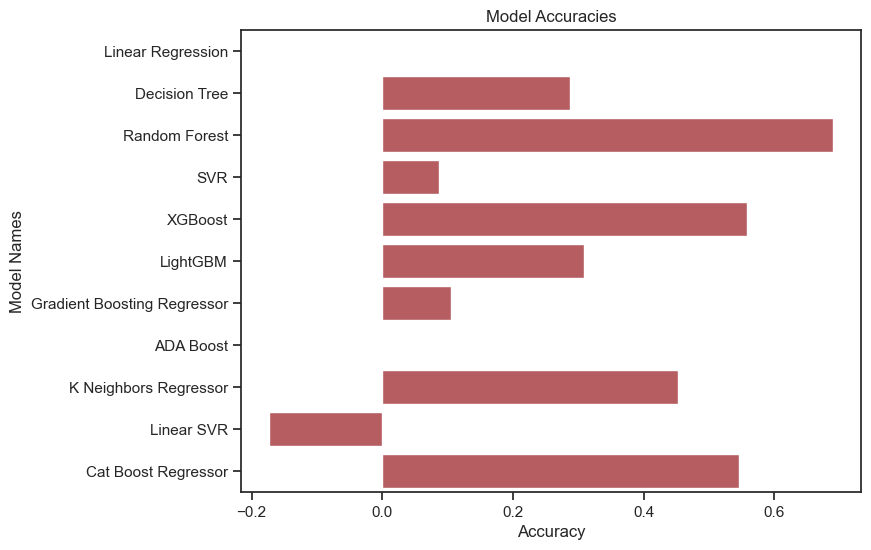

In [19]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

The best value for k neighbors in regression is: 6 with an R-squared score of 0.4558


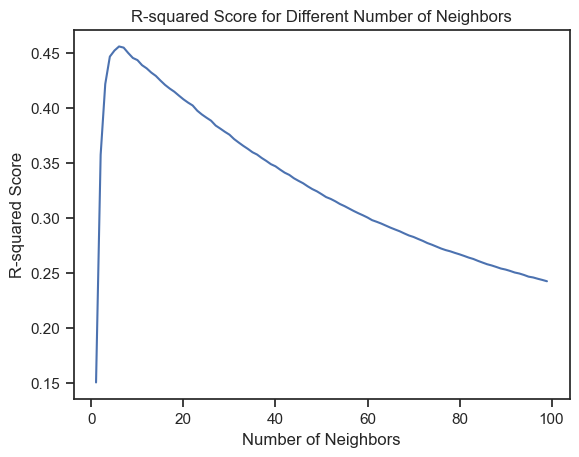

In [20]:
#create a function that checks for the best amount of neighbors
#for predicting continuous variables
#regression version

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in regression is: {best_k} with an R-squared score of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()